In [17]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
train = pd.read_csv('train.tsv', sep = '\t')
test = pd.read_csv('test.tsv', sep = '\t')

def data(n, seed):

    datas = []
    
    random.seed(seed)
    for i in range(n):
        dia_maximo = 30
        dia_minimo = 1
        mes_maximo = 12
        mes_minimo = 1
        
        dia = int(random.random() * (dia_maximo - dia_minimo) + dia_minimo)
        mes = int(random.random() * (mes_maximo - mes_minimo) + mes_minimo)
        
        datas.append(str(dia)+'-'+str(mes)+'-2018')
        
    return datas

def estoque(n, seed):

    np.random.seed(seed)
    mu, sigma = 1, 20
    s = np.random.normal(mu, sigma, n)
    s[s < 0] = s[s < 0] * -0.5
    s = s.astype(int)
    s[s < 1] = 1
    
    return s

train['date']  = data(n = train.shape[0], seed = 10)
train['stock'] = estoque(n = train.shape[0], seed = 10)

test['date']  = data(n = test.shape[0], seed = 15)
test['stock'] = estoque(n = test.shape[0], seed = 15)

In [3]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,17-5-2018,27
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,17-3-2018,15
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,24-10-2018,14
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,19-2-2018,1
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,16-4-2018,13
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",12-9-2018,2
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,5-9-2018,10
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",6-7-2018,15
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,12-2-2018,20


### Objetivo: Entender o comportamento dos dados através de visualizações

Podemos dizer que a variável 'price' é a variável target, ou seja, a variável que devemos prever. Dessa forma, a maior parte desta análise exploratória envolverá esta variável.

In [4]:
print(train['category_name'][1])
print(type(train['category_name'][1]))

Electronics/Computers & Tablets/Components & Parts
<class 'str'>


In [5]:
train['category_name'] = train['category_name'].str.split('/')

In [6]:
train['category_name']

0                                      [Men, Tops, T-shirts]
1          [Electronics, Computers & Tablets, Components ...
2                            [Women, Tops & Blouses, Blouse]
3                     [Home, Home Décor, Home Décor Accents]
4                                [Women, Jewelry, Necklaces]
                                 ...                        
1482530                           [Women, Dresses, Mid-Calf]
1482531                         [Kids, Girls 2T-5T, Dresses]
1482532    [Sports & Outdoors, Exercise, Fitness accessor...
1482533               [Home, Home Décor, Home Décor Accents]
1482534                [Women, Women's Accessories, Wallets]
Name: category_name, Length: 1482535, dtype: object

In [8]:
train['category_name'] = train['category_name'].fillna('-')

In [24]:
rotulos = [i[0] for i in train['category_name']]

unique, counts = np.unique(rotulos, return_counts=True)
rotulos = pd.DataFrame({'Unique':unique, 'Counts':counts}).sort_values('Counts', ascending=False)

In [27]:
rotulos['Unique'].unique()

array(['Women', 'Beauty', 'Kids', 'Electronics', 'Men', 'Home',
       'Vintage & Collectibles', 'Other', 'Handmade', 'Sports & Outdoors',
       '-'], dtype=object)

In [37]:
train['category_name'][0][1:3]

['Tops', 'T-shirts']

In [39]:
rotulos_sub = [cat for i in train['category_name'] for cat in i[1:3]]

unique, counts = np.unique(rotulos_sub, return_counts=True)
rotulos_sub = pd.DataFrame({'Unique':unique, 'Counts':counts}).sort_values('Counts', ascending=False)

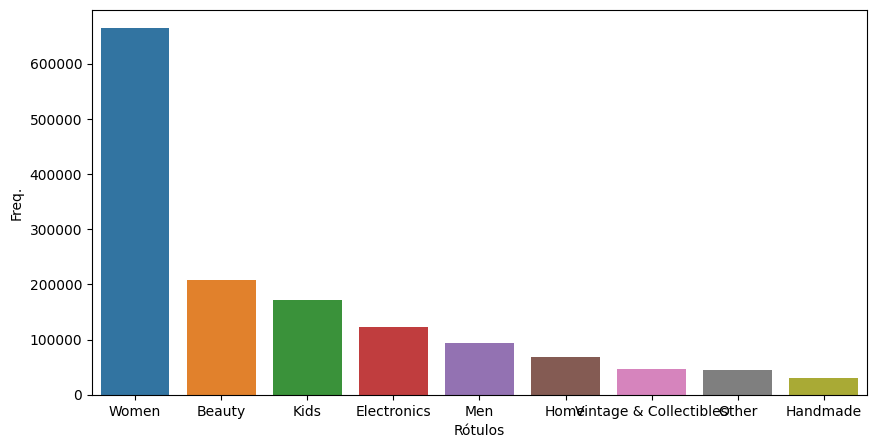

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=rotulos.head(9), x='Unique', y='Counts')
plt.xlabel('Rótulos')
plt.ylabel('Freq.')
plt.show()

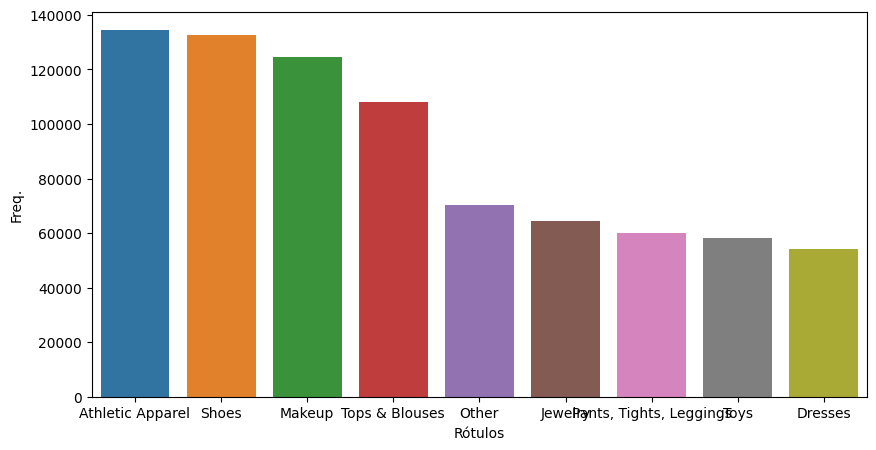

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=rotulos_sub.head(9), x='Unique', y='Counts')
plt.xlabel('Rótulos')
plt.ylabel('Freq.')
plt.show()

In [18]:
mlb = MultiLabelBinarizer()
mlb.fit(train['category_name'])
y = mlb.transform(train['category_name'])
print(y.shape)
y

(1482535, 951)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])